In [133]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import MinMaxScaler

In [134]:
df=pd.read_csv('Compiled_descriptors.csv')

In [135]:
df=df.iloc[:,1:]

In [136]:
df.columns[:-1]

Index(['MW', 'AMW', 'Sv', 'Mv', 'Me', 'Mp', 'Mi', 'GD', 'nTA', 'nBM',
       ...
       'ALOGP2', 'PDI', 'BLTF96', 'DLS_02', 'DLS_03', 'DLS_04', 'DLS_06',
       'DLS_cons', 'LLS_01', 'LLS_02'],
      dtype='object', length=737)

In [137]:
df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,0.845,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,0.880,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,0.886,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,1.018,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,1.023,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,0.841,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,1.023,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,1.000,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,0.769,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2


In [138]:
x=df.drop('Class',axis=1)
y=df['Class']

In [139]:
scalar= MinMaxScaler()
scaled_data=scalar.fit_transform(x,y)

In [140]:
new_df=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [141]:
new_df['Class']=df['Class']

In [142]:
new_df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,0.169281,0.238057,0.213939,0.818182,0.547170,0.297994,0.430233,0.273913,0.388889,0.326087,...,0.755139,0.586207,0.83,0.746269,0.666667,0.60241,0.530120,0.17,0.809524,0
1,0.175729,0.192233,0.231515,0.809465,0.386792,0.323782,0.337209,0.260870,0.333333,0.347826,...,0.786416,0.489144,1.00,1.000000,0.555556,1.00000,0.759036,0.33,1.000000,1
2,0.177233,0.073868,0.255758,0.737235,0.150943,0.234957,0.441860,0.260870,0.444444,0.217391,...,0.791778,0.176245,0.83,1.000000,1.000000,1.00000,0.927711,0.17,0.809524,2
3,0.090408,0.147558,0.168409,0.814446,0.113208,0.401146,0.360465,0.447826,0.000000,0.369565,...,0.909741,0.252874,1.00,1.000000,0.555556,1.00000,0.843373,0.67,1.000000,2
4,0.105093,0.268577,0.163106,0.864259,0.245283,0.510029,0.313953,0.447826,0.055556,0.369565,...,0.914209,0.223499,1.00,1.000000,0.555556,1.00000,0.710843,0.83,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.129809,0.290428,0.175455,0.848070,0.669811,0.329513,0.348837,0.365217,0.333333,0.282609,...,0.751564,0.687101,1.00,1.000000,0.333333,1.00000,0.722892,0.33,1.000000,2
565,0.173723,0.201787,0.230455,0.823163,0.075472,0.501433,0.209302,0.317391,0.111111,0.326087,...,0.914209,0.249042,1.00,1.000000,0.777778,1.00000,0.879518,0.33,1.000000,1
566,0.101941,0.100761,0.183939,0.775841,0.075472,0.329513,0.430233,0.417391,0.222222,0.347826,...,0.893655,0.365262,1.00,1.000000,0.777778,1.00000,0.879518,1.00,1.000000,0
567,0.121212,0.217003,0.162500,0.742217,0.754717,0.083095,0.802326,0.347826,0.444444,0.086957,...,0.687221,0.825032,0.67,0.746269,0.888889,0.60241,0.662651,0.33,0.603175,2


In [143]:
x_trf=new_df.drop('Class',axis=1)
y_trf=new_df['Class']

In [144]:
k=30
features_chi2=SelectKBest(chi2, k=k)
x_new=features_chi2.fit_transform(x_trf,y_trf)
selected_features=df.columns[:-1][features_chi2.get_support()]

In [145]:
print(selected_features.to_list())
final_df=df[selected_features.to_list()]

['nF', 'nX', 'P_VSA_ppp_hal', 'SM03_EA(dm)', 'nR=Cs', 'nR=Ct', 'C-005', 'C-006', 'C-016', 'H-053', 'O-060', 'SdsCH', 'CATS2D_04_DD', 'CATS2D_04_DA', 'CATS2D_05_DA', 'CATS2D_07_DL', 'CATS2D_03_PL', 'T(O..F)', 'T(F..F)', 'F03[C-S]', 'F04[N-Cl]', 'F05[C-S]', 'F05[N-N]', 'F05[N-F]', 'F06[C-F]', 'F07[C-F]', 'F07[C-Br]', 'F09[C-F]', 'F09[N-F]', 'F10[C-F]']


In [146]:
final_df['Class']=df['Class']
m=final_df.columns.to_list()

C:\Users\Akshat\AppData\Local\Temp\ipykernel_17988\3084608001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=df['Class']


In [147]:
x_final=new_df.drop("Class",axis=1)
y_final=new_df['Class']

In [72]:
abs(new_df.corr(method='pearson')['Class']).sort_values(ascending=False).head(10)

Class           1.000000
C-005           0.332119
C-016           0.311954
MATS2p          0.299658
MATS2i          0.280997
GATS2i          0.278562
SdsCH           0.266876
GATS2p          0.262576
CATS2D_04_DA    0.256093
PCR             0.248253
Name: Class, dtype: float64

In [148]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=GradientBoostingClassifier()

In [75]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('RF', clf1),  # Include the first classifier (Logistic Regression)
          # Include the second classifier (Random Forest)
        ('GBC', clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
) 

In [76]:
np.mean(cross_val_score(clf1,x_final,y_final,cv=20,scoring='accuracy'))

0.6575738916256159

In [182]:
len(m)

31

In [150]:
new_df[final_df.columns.to_list()]

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.000000,0.00,0.406857,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.00,0.000000,1.000000,0.000000,0.333333,0.000000,0.833333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.00,0.000000,0.666667,0.333333,0.000000,0.000000,0.666667,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.166667,0.25,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.000000,0.00,0.146925,0.500000,0.000000,0.000000,0.133333,0.500000,0.0,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.000000,0.00,0.103392,0.000000,0.000000,0.666667,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.000000,0.00,0.647198,0.000000,0.000000,0.000000,0.400000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [151]:
one_df=df[m]

In [152]:
one_df

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.0,0.00,2.243,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.00,0.000,6.0,0.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.00,0.000,4.0,2.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.00,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,1.0,39.15,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.0,0.00,0.810,3.0,0.0,0.0,2.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.0,0.00,0.570,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.0,0.00,3.568,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [153]:
x_trf=one_df.drop('Class',axis=1)
y_trf=one_df['Class']

In [80]:
x_trf=df

In [154]:
new_df.corr(method='spearman')['Class'].sort_values().tail(10)

SpDiam_AEA(bo)    0.214969
CATS2D_04_DD      0.222797
SssCH2            0.226765
GATS2i            0.228884
Chi1_EA(dm)       0.229526
GATS2p            0.231268
MCD               0.231931
F03[N-N]          0.233445
CATS2D_04_DA      0.293005
Class             1.000000
Name: Class, dtype: float64

In [155]:
chi2_values, p_values = chi2(x_trf, y_trf)

In [156]:
chi2_df = pd.DataFrame({
    'Feature': x_trf.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})


In [157]:
k=chi2_df['Chi2 Value'].sort_values(ascending=False).head(20).index.to_list()

In [158]:
chi2_df['Chi2 Value'].sort_values(ascending=False).head(20)


17    16706.425783
18     4828.034718
2       998.596475
24      238.394261
29      176.513047
7       138.028873
11      121.211799
6       105.957106
8        92.854008
25       91.630080
13       89.496266
14       86.007566
15       84.314319
21       74.609872
0        70.485640
27       69.809292
9        66.903862
1        64.263012
19       63.942203
28       62.521004
Name: Chi2 Value, dtype: float64

In [159]:
mask1=chi2_df['P-Value']<=0.05
mask2=chi2_df['Chi2 Value']>=9.00

In [160]:
j=chi2_df[mask1&mask2]['Feature'].tolist()

In [161]:
j

['nF',
 'nX',
 'P_VSA_ppp_hal',
 'SM03_EA(dm)',
 'nR=Cs',
 'nR=Ct',
 'C-005',
 'C-006',
 'C-016',
 'H-053',
 'O-060',
 'SdsCH',
 'CATS2D_04_DD',
 'CATS2D_04_DA',
 'CATS2D_05_DA',
 'CATS2D_07_DL',
 'CATS2D_03_PL',
 'T(O..F)',
 'T(F..F)',
 'F03[C-S]',
 'F04[N-Cl]',
 'F05[C-S]',
 'F05[N-N]',
 'F05[N-F]',
 'F06[C-F]',
 'F07[C-F]',
 'F07[C-Br]',
 'F09[C-F]',
 'F09[N-F]',
 'F10[C-F]']

In [186]:
k

['nF',
 'nX',
 'P_VSA_ppp_hal',
 'SM03_EA(dm)',
 'nR=Cs',
 'nR=Ct',
 'C-005',
 'C-006',
 'C-016',
 'H-053',
 'O-060',
 'SdsCH',
 'CATS2D_04_DD',
 'CATS2D_04_DA',
 'CATS2D_05_DA',
 'CATS2D_07_DL',
 'CATS2D_03_PL',
 'T(O..F)',
 'T(F..F)',
 'F03[C-S]',
 'F04[N-Cl]',
 'F05[C-S]',
 'F05[N-N]',
 'F05[N-F]',
 'F06[C-F]',
 'F07[C-F]',
 'F07[C-Br]',
 'F09[C-F]',
 'F09[N-F]',
 'F10[C-F]']

In [184]:
k=chi2_df[mask1&mask2]['Feature'].to_list()

In [163]:
final_df=new_df[j]

In [164]:
final_df['Class']=new_df['Class']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_17988\695168134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=new_df['Class']


In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
new_df=new_df.rank()

In [168]:
clf1=RandomForestClassifier()


In [169]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [234]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [240]:
lst=[]

In [248]:
lst

[0.73815987933635, 0.7010935143288084, 0.652526395173454, 0.582051282051282]

In [ ]:
plt.

In [299]:
x_train_trf,x_test_trf,y_train_trf,y_test_trf=train_test_split(x_trf,y_trf,random_state=42,test_size=0.1)

In [244]:
lst.append(np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

In [201]:
clf1.fit(x_train_trf,y_train_trf)
y_pred=clf1.predict(x_test_trf)

In [246]:
clf2=GradientBoostingClassifier()
clf3=LogisticRegression()
clf4=AdaBoostClassifier()

In [247]:
lst.append(np.mean(cross_val_score(clf2,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf3,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf4,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [ ]:
clf2=RandomForestClassifier()

In [285]:
accuracy_score(y_pred,y_test_trf)

0.3508771929824561

In [289]:
np.mean(cross_val_score(clf2,x_trf,y_trf,cv=10,scoring='accuracy'))

0.5552318295739348

In [288]:
np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy'))

0.7246983408748114

In [131]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
clf4=SVC()
clf5=AdaBoostClassifier()
clf6=KNeighborsClassifier()

In [ ]:
np.mean(cross_val_score(clf,x_train_trf,y_train_trf,cv=10,scoring='accuracy'))

In [101]:
x_test_trf

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,ALOGP2,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02
204,0.317645,0.281847,0.340455,0.874222,0.518868,0.424069,0.209302,0.152174,0.444444,0.608696,...,0.116478,0.852547,0.560664,0.50,0.746269,0.222222,0.602410,0.409639,0.17,0.396825
70,0.190773,0.216472,0.245000,0.839352,0.358491,0.389685,0.279070,0.243478,0.277778,0.456522,...,0.076418,0.837355,0.357599,1.00,1.000000,0.555556,1.000000,0.759036,0.33,1.000000
131,0.498603,0.123408,0.541288,0.767123,0.216981,0.277937,0.534884,0.069565,0.444444,0.652174,...,0.099408,0.863271,0.269476,0.33,0.253731,0.777778,0.192771,0.397590,0.00,0.000000
431,0.346515,0.095276,0.404848,0.739726,0.216981,0.217765,0.546512,0.126087,0.444444,0.434783,...,0.076813,0.815907,0.394636,0.50,0.507463,0.888889,0.602410,0.650602,0.17,0.396825
540,0.162906,0.144639,0.227727,0.779577,0.226415,0.297994,0.581395,0.300000,0.055556,0.369565,...,0.018298,0.904379,0.395913,1.00,1.000000,0.777778,1.000000,0.879518,0.33,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.180027,0.218861,0.234242,0.836862,0.339623,0.386819,0.395349,0.282609,0.166667,0.413043,...,0.034484,0.939231,0.438059,1.00,1.000000,0.555556,1.000000,0.843373,0.50,0.809524
75,0.162118,0.185686,0.222879,0.814446,0.301887,0.352436,0.406977,0.286957,0.222222,0.347826,...,0.020799,0.854334,0.335888,1.00,1.000000,0.555556,1.000000,0.759036,0.17,1.000000
249,0.181603,0.093595,0.256970,0.754670,0.113208,0.275072,0.569767,0.256522,0.055556,0.391304,...,0.085298,0.869526,0.264368,0.83,0.746269,1.000000,0.795181,0.746988,0.17,0.809524
238,0.147647,0.381281,0.172348,0.858032,0.245283,0.512894,0.383721,0.417391,0.111111,0.369565,...,0.072817,0.924933,0.224777,1.00,1.000000,0.555556,1.000000,0.710843,0.33,1.000000


In [102]:
x_df=pd.concat([x_train_trf,x_test_trf],axis=0)

In [103]:
y_df=new_df['Class']

In [104]:
the_df=pd.concat([x_df,y_df],axis=1)

In [105]:
the_df.to_csv('for_regression1.csv')

In [106]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [298]:
classification_report(y_pred,y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.50      0.57      0.53        14\n           1       0.47      0.54      0.50        13\n           2       0.96      0.83      0.89        30\n\n    accuracy                           0.70        57\n   macro avg       0.64      0.65      0.64        57\nweighted avg       0.74      0.70      0.71        57\n'

In [277]:
confusion_matrix(y_test_trf,y_pred)

array([[ 8,  5,  2],
       [ 4,  3,  7],
       [ 3,  5, 20]], dtype=int64)

In [111]:
matthews_corrcoef(y_test_trf,y_pred)

0.47846978638064225

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [249]:
plotting_df=pd.DataFrame(columns=['Mod','Accuracy'])

In [251]:
plotting_df['Mod']=['RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','AdaBoostClassifier']

In [252]:
plotting_df['Accuracy']=lst

In [253]:
plotting_df

,Mod,Accuracy
0,RandomForestClassifier,0.738160
1,GradientBoostingClassifier,0.701094
2,LogisticRegression,0.652526
3,AdaBoostClassifier,0.582051


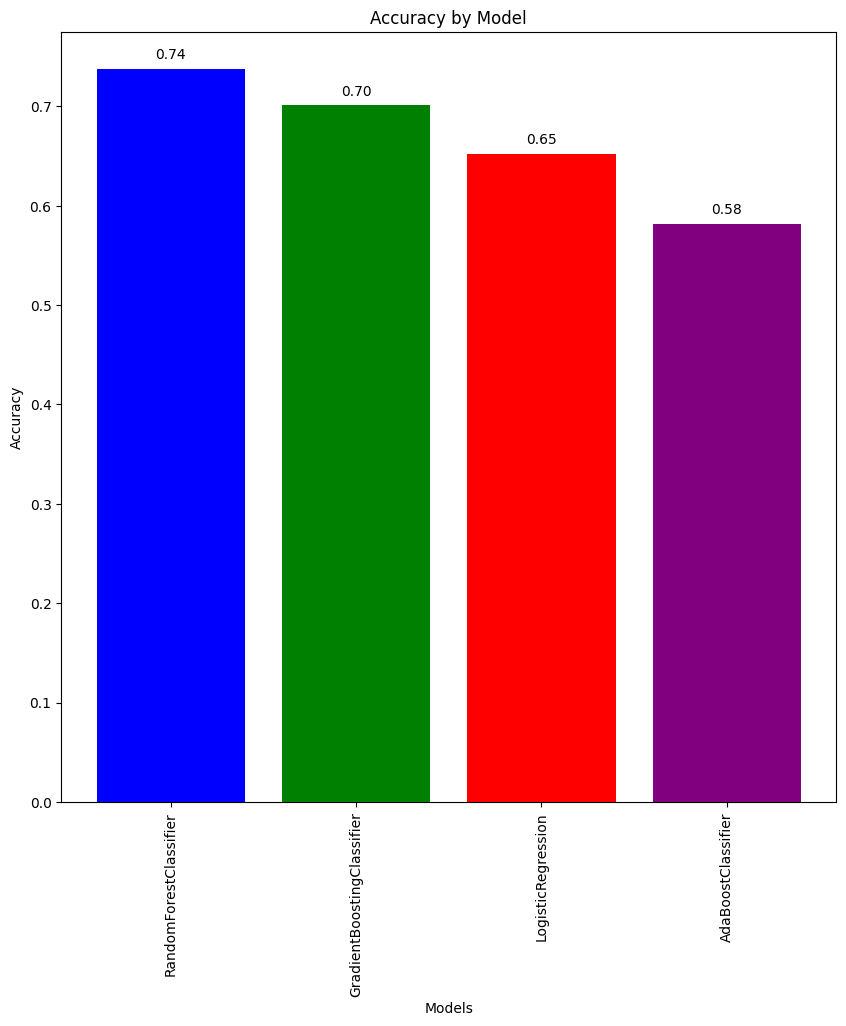

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# Assuming 'plotting' is a dictionary with 'Mod' and 'Accuracy' columns

# Define a color list
colors = ['blue', 'green', 'red', 'purple', 'orange','violet']  # Adjust colors and length as needed

# Create the bar plot with custom colors
plt.bar(x=plotting_df['Mod'], height=plotting_df['Accuracy'], color=colors[:len(plotting_df['Mod'])])

# Rotate x-axis labels (optional)
plt.xticks(rotation='vertical')  
for i, (v, label) in enumerate(zip(plotting_df['Accuracy'], plotting_df['Mod'])):
  y_pos = v + 0.01  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v:.2f}", ha='center')  # Format accuracy with 2 decimal places


# Add accuracy labels using plt.text (optional)
# ... (code for adding accuracy labels remains the same)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy by Model")
plt.show()

In [261]:
from sklearn.metrics import confusion_matrix

AttributeError: 'Series' object has no attribute 'reshape'

In [344]:
clf4.fit(x_train_trf,y_train_trf)


c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [345]:
y_pred=clf4.predict(x_test_trf)

In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test_trf)

0.5964912280701754

In [347]:
confusion_matrix(y_test_trf,y_pred)


array([[ 9,  4,  3],
       [ 4,  4,  7],
       [ 3,  2, 21]], dtype=int64)

In [348]:
pd.DataFrame(confusion_matrix(y_test_trf,y_pred))

,0,1,2
0,9,4,3
1,4,4,7
2,3,2,21


In [349]:
classification_report(y_pred, y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.56      0.56      0.56        16\n           1       0.27      0.40      0.32        10\n           2       0.81      0.68      0.74        31\n\n    accuracy                           0.60        57\n   macro avg       0.55      0.55      0.54        57\nweighted avg       0.64      0.60      0.61        57\n'